# Agrupamento ou Clusterização


Disciplina:


      Inteligência Artificial | Enpe 4 | 2021/2
Alunos: 

        Leticia Bossatto Marchezi        | RA: 791003
        Luís Augusto Simas do Nascimento | RA: 790828



## Aquisição

Bibliotecas

In [1]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import pandas as pd

O dataset escolhido foi referente a observações sobre vinhos, incluindo features numéricas contínuas como concentrações de componentes químicos(Álcool, Ácido málico, Flavonóides) e outras características. Informações sobre o dataset encontradas em: http://archive.ics.uci.edu/ml/datasets/Wine


Leitura dos dados a partir da url do arquivo

In [2]:
df = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data", 
                 names=["class",  "Alcohol","Malic acid","Ash","Alcalinity of ash","Magnesium","Total phenols","Flavanoids","Nonflavanoid phenols","Proanthocyanins","Color intensity","Hue","OD280/OD315 of diluted wines","Proline"])

Visualização do dataframe

In [3]:
df

,class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


Exclusão da coluna de classe

In [4]:
df.drop(columns="class", inplace=True)

## Normalizando os atributos
Normaliza os dados contínuos com a função MinMaxScaler, limitando cada feature a um intervalo específico e permitindo uma análise mais consistente da proximidade dos dados independente da unidade de medida adotada.

In [5]:
mms = MinMaxScaler()
mms.fit(df)
data = mms.transform(df)

Dados normalizados

In [6]:
data

array([[0.84210526, 0.1916996 , 0.57219251, ..., 0.45528455, 0.97069597,
        0.56134094],
       [0.57105263, 0.2055336 , 0.4171123 , ..., 0.46341463, 0.78021978,
        0.55064194],
       [0.56052632, 0.3201581 , 0.70053476, ..., 0.44715447, 0.6959707 ,
        0.64693295],
       ...,
       [0.58947368, 0.69960474, 0.48128342, ..., 0.08943089, 0.10622711,
        0.39728959],
       [0.56315789, 0.36561265, 0.54010695, ..., 0.09756098, 0.12820513,
        0.40085592],
       [0.81578947, 0.66403162, 0.73796791, ..., 0.10569106, 0.12087912,
        0.20114123]])

## Agrupamento
Fazendo agrupamentos de 1 a 9 clusters em um laço de repetição e salvando as distâncias de cada iteração para validação posterior

In [7]:
distances = []
groups = range(1,10)

for group in groups:
  kmeans = KMeans(n_clusters=group)
  kmeans.fit(data)
  distances.append(kmeans.inertia_)

## Validação do agrupamento
Visualização da variação da soma dos quadrados das distâncias em função da quantidades de clusters.


Analisando o decrescimento da soma dos quadrados das distâncias, é possível concluir com o método do cotovelo que a melhor quantidade de clusters para minimizar o valor do eixo y é k=4, já que há grande variação do índice entre o k=3 e k=4, porém o mesmo não acontece de k=4 e k=5, tendo uma variação não significativa.

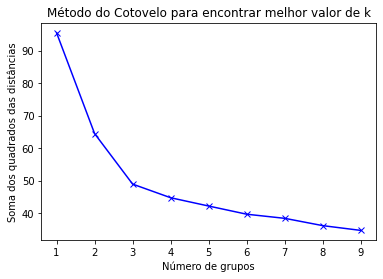

In [8]:
plt.plot(groups, distances, 'bx-')
plt.xlabel('Número de grupos')
plt.ylabel('Soma dos quadrados das distâncias')
plt.title('Método do Cotovelo para encontrar melhor valor de k')
plt.show()

Visualização do posicionamento dos clusters e seus centróides em duas dimensões para o melhor número de grupos.

In [9]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(data)
y_kmeans = kmeans.fit_predict(data)

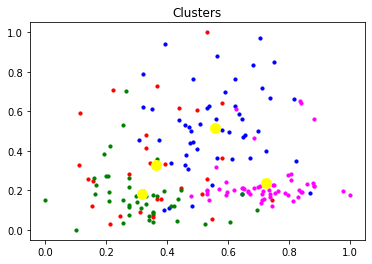

In [10]:
plt.scatter(data[y_kmeans==0, 0], data[y_kmeans==0, 1], c='red',s=10, label ='Cluster 1')
plt.scatter(data[y_kmeans==1, 0], data[y_kmeans==1, 1], c='blue',s=10, label ='Cluster 2')
plt.scatter(data[y_kmeans==2, 0], data[y_kmeans==2, 1], c='green',s=10, label ='Cluster 3')
plt.scatter(data[y_kmeans==3, 0], data[y_kmeans==3, 1], c='magenta',s=10, label ='Cluster 4')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='yellow', label = 'Centroids')
plt.title('Clusters')
plt.show()